In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy
import skimage
import csv

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *
import imutils

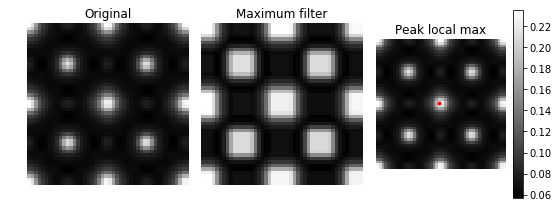

[0.00032587 0.00074156 0.00129999 0.0019182  0.00258037 0.00329554
 0.00405678 0.00483564 0.00553268 0.00621246 0.00684578 0.00748422
 0.00811232 0.00875225 0.00935332 0.0099363  0.01051263 0.01107797
 0.01162776 0.0121038  0.01261048 0.01304462 0.01345218 0.01386417
 0.01426726 0.01460818 0.01496355 0.01531782 0.01565808 0.01600845
 0.01636356 0.01669601 0.01704498 0.01738138 0.01769837 0.01802755
 0.01834558 0.01866404 0.01897411 0.01929716 0.01962067 0.01995378
 0.02028382 0.02061939 0.02095327 0.02127322 0.02160376 0.02192411
 0.02224621 0.02256138 0.02288608 0.02320934 0.02352099 0.02381928
 0.02413749 0.02445897 0.02475997 0.02508758 0.02540787 0.02572817
 0.02603358 0.02636043 0.0266903  0.02702376 0.02734632 0.02765782
 0.02798816 0.02832002 0.02864511 0.02895522 0.02927221 0.02959489
 0.02990411 0.03020363 0.03050726 0.0308225  0.03113143 0.031439
 0.0317355  0.03203285 0.03233623 0.03264671 0.0329622  0.03327223
 0.03356758 0.03387039 0.03414893 0.03444216 0.03473471 0.035027

In [9]:
# Process 2D output covering 112.9 to 353.33 mrad from 100nm model
# Simulation keep using 24.5 mrad convergence angle
# Although new calibration suggesting conv angle should be 25.6mrad instead of 24.5mrad, but change conv angle will require
# change of collection angle at the same time
# For HAADF image, this difference probably won't matter much

from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import data, img_as_float

path = '/srv/home/chenyu/antisite/STO_CL60/CL60_8x8model/'
nslice = 300
source_size = 110
integration_radius = 130
px_size = 17.5

intensity = np.zeros(nslice)

for islice in range(nslice):
    
    name = '_slice' + str(islice) + '_'
    file_2D = [image for image in os.listdir(path) if '2Doutput' and name in image]
    file_2D = file_2D[0]
#     print(file_2D)
    image_2D = loadMRCfile(path + file_2D)

#     im = img_as_float(Convolution_2D(image,source_size))
    im = skimage.img_as_float(image_2D)

    # image_max is the dilation of im with a 5x5 structuring element
    # It is used within peak_local_max function
    image_max = ndi.maximum_filter(im, size=5, mode='constant')

    # Comparison between image_max and im to find the coordinates of local maxima
    # min_distance = 20 will find only the Sr peak at center
    # Peak positions are found in integers
    coordinates = peak_local_max(im, min_distance=20)
#     print(coordinates)
    
    center = [coordinates[0,0], coordinates[0,1]]
    circular_mask = create_circular_mask(im.shape[0],im.shape[1],center, integration_radius/px_size)
    
    # Intensity is a list of averaged intensity inside the Sr mask
    intensity[islice] = (im*circular_mask).sum()/circular_mask.sum()
    
# Display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

im2 = ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')
fig.colorbar(im2,ax=ax[2])

fig.tight_layout()

plt.show()
print(intensity)

1.0182806514138698 -1.50669881282998


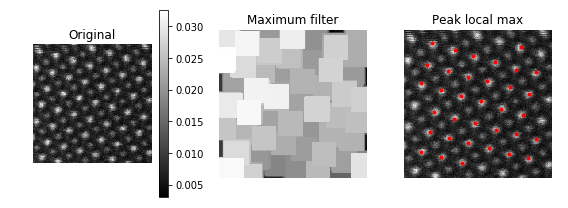

In [59]:
path = '/srv/home/chenyu/DEbackup/071519/S2/'
file_HAADF = [image for image in os.listdir(path) if '_Preview' in image]
file_HAADF = file_HAADF[0]
with open(path +  file_HAADF) as csvfile:
    file=csv.reader(open(path+file_HAADF,'r'))
    n=[]
    for row in file:
        n.append(row)

HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)
HAADFarray = np.reshape(HAADFarray,(150,150))

(BeamLevel, DarkLevel) = BeamLevelCalibrate('/srv/home/chenyu/DEbackup/071519/DetectorScan/HAADF_Preview_512_512_6_21_09_PM.csv',512)
print(BeamLevel,DarkLevel)
HAADFarray = (HAADFarray - DarkLevel)/(BeamLevel - DarkLevel)

im = img_as_float(np.reshape(HAADFarray,(150,150)))
#     im = im - np.amin(im)
image_max = ndi.maximum_filter(im, size=25, mode='constant')

coordinates = peak_local_max(im, min_distance=12)

center = [coordinates[0,0], coordinates[0,1]]

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
im0 = ax[0].imshow(im, cmap=plt.cm.gray)
fig.colorbar(im0,ax=ax[0])
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

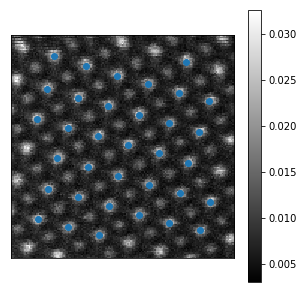

In [60]:
# Fit positions of each peak

peaks_x_fit = []
peaks_y_fit = []
for i in range(coordinates.shape[0]):

    x = int(coordinates[i][1])
    y = int(coordinates[i][0])

    patch = im[y-7:y+7,x-7:x+7]
    bg = np.amin(patch)
    guess = (bg,patch[7,7]-bg,7, 7, 3, 3)
    bounds = ([min(0,bg),0,0,0,1,1],[np.inf,np.inf,14,14,10,10])
    param = fitGaussianx2(patch, guess, bounds)

    peaks_x_fit.append(param[2]+x-7)
    peaks_y_fit.append(param[3]+y-7)

fig = plt.figure(figsize=(5,5))
im0 = plt.imshow(im,cmap=plt.cm.gray)
fig.colorbar(im0)
plt.scatter(peaks_x_fit,peaks_y_fit)
plt.xticks([])
plt.yticks([])

peaks_x_fit = np.asarray(peaks_x_fit)
peaks_y_fit = np.asarray(peaks_y_fit)
np.save(path +'SrPeaks_x.npy',np.asarray(peaks_x_fit))
np.save(path +'SrPeaks_y.npy',np.asarray(peaks_y_fit))

[18. 18. 19. 17. 20. 19. 19. 18. 19. 18. 20. 18. 19. 18. 19. 22. 19. 19.
 20. 18. 19. 17. 20. 20. 19. 18. 20. 19. 20. 19. 20. 21. 20. 21.]
19.11764705882353


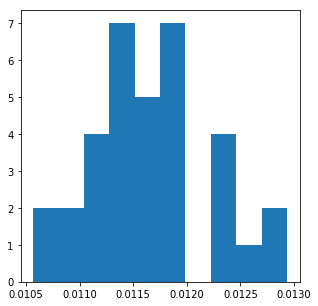

In [61]:
# Determine thickness of each atomic site
integration_radius = 130
px_size = 17.5

peaks_x_fit = np.load(path + 'SrPeaks_x.npy')
peaks_y_fit = np.load(path + 'SrPeaks_y.npy')

thickness_list = np.zeros(peaks_x_fit.shape[0])
intensity_list = np.zeros(peaks_x_fit.shape[0])
for i in range(peaks_x_fit.shape[0]):
    center = [peaks_x_fit[i],peaks_y_fit[i]]
    circular_mask = create_circular_mask(im.shape[0],im.shape[1],center, integration_radius/px_size)
    intensity_list[i] = (im*circular_mask).sum()/circular_mask.sum()  # Checked position of mask, right on atom
    thickness_list[i] = argmin(np.absolute(intensity - intensity_list[i]))+1 # have 1 uc offset, intensity[0] corresponds to 1 uc

np.save(path + 'SrPeaks_thickness.npy',np.asarray(thickness_list))
fig = plt.figure(figsize=(5,5))
plt.hist(intensity_list)
print(thickness_list)
print(np.mean(np.asarray(thickness_list)))

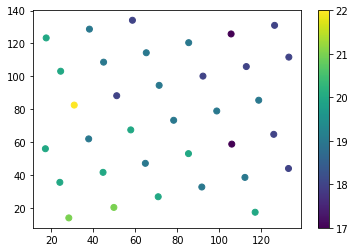

In [62]:
plt.scatter(peaks_x_fit,peaks_y_fit,c=thickness_list)
plt.colorbar()

In [18]:
filelist = glob.glob1(path + 'npy/','*.npy')
PACBED = np.zeros((512,512))
for i in range(len(filelist)):
    frame = np.load(path + 'npy/' + filelist[i])
    PACBED = PACBED + frame
PACBED = PACBED / len(filelist)
np.save(path + 'PACBED.npy',PACBED)
plt.imshow(PACBED)
plt.colorbar()

KeyboardInterrupt: 

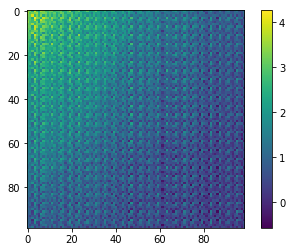

In [17]:
plt.imshow(PACBED[-100:-1,-100:-1])
plt.colorbar()

In [3]:
def BeamLevelCalibrate(path,size):
    center = [258,261]
    mask = create_circular_mask(size,size, center, 5)
    with open(path) as csvfile:
        file=csv.reader(open(path,'r'))
        Beam = []
        Dark = []
        n=[]
        for row in file:
            n.append(row)
            
    HAADFarray = np.transpose(np.asarray(n))
    HAADFarray = np.squeeze(HAADFarray)
    HAADFarray = HAADFarray.astype(np.float)
    DetectorScan = np.reshape(HAADFarray,(size,size))
    
    DarkLevel = DetectorScan[np.nonzero(DetectorScan*mask)].mean()
    DarkLevel = np.amin(DetectorScan)
    BeamLevel = DetectorScan[np.nonzero(np.heaviside(DetectorScan,0))].mean()

    return(BeamLevel,DarkLevel)

In [4]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [5]:
import struct
import mrcfile
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io
import time

def loadMRCfile(filepath):
    with open(filepath, mode='rb') as file: # b is important -> binary
        file.seek(0)
        read_bytes = file.read(8)
        frame_width = struct.unpack('<i',read_bytes[0:4])
        frame_width = frame_width[0]
        frame_height = struct.unpack('<i',read_bytes[4:8])
        frame_height = frame_height[0]
        image = np.zeros((frame_height,frame_width))
        file.seek(256*4)
        dataset = file.read(frame_width*frame_height*4)
        for irow in range(frame_height):
            for icol in range(frame_width):
                pixel = struct.unpack('<f',dataset[(irow*frame_width+icol)*4:(irow*frame_width+icol+1)*4])[0]
                image[irow,icol] = pixel
        return image

In [6]:
def gaussianx2(xdata_tuple,bg,height, center_x, center_y, width_x, width_y):

    (x, y) = xdata_tuple
    width_x = float(width_x)
    width_y = float(width_y)
    g = height*exp(
                 -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)+bg
    return g.ravel()

In [7]:
def fitGaussianx2(data, guess, bounds):
    x = np.linspace(0, data.shape[1]-1, data.shape[1])
    y = np.linspace(0, data.shape[0]-1, data.shape[0])
    x, y = np.meshgrid(x, y)
    xdata_tuple = (x,y)
    popt, pcov = optimize.curve_fit(gaussianx2, xdata_tuple, data.ravel(), p0=guess,bounds=bounds,method='trf',verbose=0,maxfev=100000)
    return popt

In [8]:
def readCBEDfromMRC(fname):
    f = open(fname, 'rb')
    count = 10
    b = f.read(count*4)
    data_types = {0:np.uint8,1:np.intc,2:np.float32,6:np.uint16}
    c = np.frombuffer(b, dtype=np.int32,count=count)
    data_size = c[:3]
    data_type = data_types[c[3]]

    f.seek(1024)

    count = data_size[0]*data_size[1]*data_size[2]
    cbed = f.read(count*4)
    cbed_arr = np.frombuffer(cbed,dtype=data_type,count=count)
    cbed_arr = np.reshape(cbed_arr,tuple(data_size))
    f.close
    f.closed
    return cbed_arr